Author : Liam Toran

In [3]:
import numpy as np
import pandas as pd
from skbio.stats.composition import closure
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from skbio.stats.composition import (closure, perturb, power, ilr, ilr_inv, 
                                     inner, perturb_inv, clr, centralize,
                                     multiplicative_replacement, _gram_schmidt_basis)
from skbio import TreeNode
import scipy
import ternary
import matplotlib.image as mpimg
from functools import partial
from scipy.optimize import minimize, fmin_bfgs, fmin_cg
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from canvas.stats.regression import simplicialOLS
from canvas.phylogeny import phylogenetic_basis
#from canvas.viz.balances import balanceplot

from scipy.cluster.hierarchy import average
from scipy.spatial.distance import euclidean, canberra, braycurtis, jaccard
from scipy.stats import linregress

%matplotlib inline

In [4]:
def normsquare(x):
    return np.sum([p**2 for p in x])

def distance(x1,x2):
    return np.sqrt(normsquare(x1-x2))

def shift1(l):
    newlist = [0] * len(l)
    for i in range(1,len(l)):
        newlist[i] = l[i-1]
    return newlist

def shift(l,n):
    sl = l
    table = [l]
    if n == 0:
        return table
    else:
        for k in range(n):
            sl = shift1(sl)
            table.append(sl)
        return table

def join(point1,point2):
    x0, y0 = point1
    x1, y1 = point2
    line_ans = lambda x: x* (y1-y0) / (x1-x0) + (y1 - y0) 
    

n = 30  #otus 
band = 10 #band size
p = n - band + 1 #samples
y = [1./band]*band + [0]*(n-band)
table = shift(y,p-1)
table = np.column_stack(table)
u, k, v = np.linalg.svd(table.T)

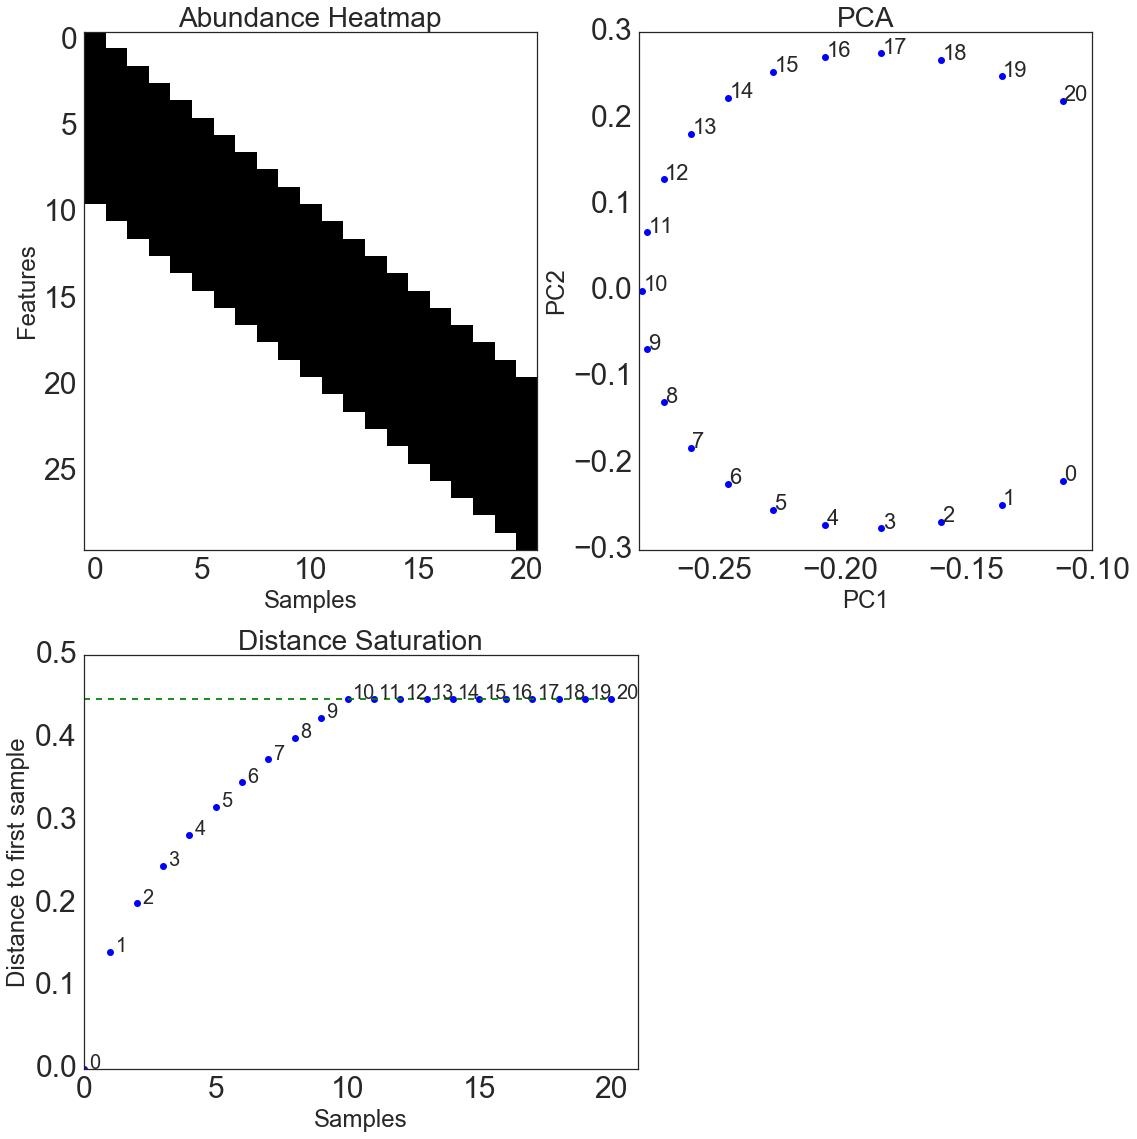

In [18]:
sns.set(font_scale=3)
sns.set_style("white")

fig = plt.figure(figsize=(20, 20))

gs = GridSpec(100, 100, bottom=0.18,left=0.18,right=0.88)

ax1 = fig.add_subplot(gs[:50, :45])
ax2 = fig.add_subplot(gs[:50, 55:])
ax3 = fig.add_subplot(gs[60:, :55])

# Plot 1
ax1.imshow(table, aspect='auto', interpolation='nearest')
ax1.set_title('Abundance Heatmap', fontsize=28)
#ax1.set_xticks(fontsize=20)
#ax1.set_yticks(fontsize=20, rotation=0)
ax1.set_xlabel('Samples',fontsize=24)
ax1.set_ylabel('Features',fontsize=24, rotation=90)

# Plot 2
ax2.plot(u[:, 0], u[:, 1] ,'ob')
for i, txt in enumerate(range(p)):  #POINTS = SAMPLES
    ax2.annotate(txt, (u[i,0]+5e-4,u[i,1]), fontsize=22)
ax2.set_title('PCA', fontsize=28)
ax2.set_xlabel('PC1',fontsize=24)
ax2.set_ylabel('PC2',fontsize=24)

# Plot 3
endpoint_distance = [distance(table[:,0],table[:,x]) for x in range(p)]
ax3.plot(range(p),endpoint_distance, 'ob')
for i, txt in enumerate(range(p)):  #POINTS = SAMPLES
    ax3.annotate(txt, (i+.2,endpoint_distance[i]),fontsize=20)
ax3.set_title('Distance Saturation', fontsize=28)
ax3.set_ylabel('Distance to first sample',fontsize=24)
ax3.set_xlabel('Samples',fontsize=24)
ax3.set_xlim([0, 21])
ax3.set_ylim([0, 0.5])
ax3.plot(range(p),[endpoint_distance[p-1] for x in range(p)], c='g', linestyle='--')

plt.savefig('../results/simulations.pdf')